# **The Battle of Neighborhoods: Opening a Restaurant Across Horizon** 
#### **Building models for segmentation of neighborhoods to find favorable locations for starting a fast food joint in the city of Toronto.**
by: [Usman Khan](https://www.linkedin.com/in/usman-khan-458755163/)

## **Introduction**

### **Business Problem**

<img src="logo.png">

Mirch Masala (fictitious) is a restaurant renowned for bringing the mouth-watering taste of Pakistani and Indian cuisine to your tables. Among the wide range of courses on the menu, their specialty lies in Biryani, Karahi, and Chicken Tikka. Their first outing in New York City was an enormous hit, and so the restaurant has set its eyes on expanding its business across the border in the city of Toronto. Home to a large population of immigrants from the subcontinent, Toronto shares a similar environment to New York. Thus, the project's goal is to figure out the city's most desirable locations for opening up Mirch Masala's new branch. 

To ensure the success of our project, the stakeholders require insights into the demographics and the neighboring businesses. For instance:

* The number of eateries present in each neighborhood,
* The most popular restaurants (both similar and different cuisines),
* The traffic of our targeted demographic,
* And the frequency of our targeted audience.

As this project has a lot of aspects to be taken into account, it is open for discussion and targeted towards the entrepreneurs and stakeholders. This project gives Data Scientists/Analysts the opportunity to apply their knowledge of data science and subsequent analytical skills in order to assess, evaluate and provide inputs to the challenge

### **Description of Data**

The data required are mentioned below:

* 1st Data:
Recent most updated record of traffic signal -  vehicle and pedestrian volumes in Toronto. This data is typically collected between 7:30 a.m. and 6:00 p.m at intersections where there are traffic signals.
    
* 2nd Data: 
The list of neighborhoods in Toronto represented by postal codes and their boroughs. We will be using the Geocoder Python package in order to retrieve the postal code's coordinates.

* 3rd Data: 
The most common venues of a given neighborhood in Toronto. This information is stored inside Foursquare Location Data, and we will use Foursquare API in order to access it.

To recap, we will use the 1st Data to analyze the pedestrian/vehicle volume. Then, we load the 2nd Data to obtain the exact coordinates for each neighborhood based on their respective postal code, allowing us to explore and map the city. By using those coordinates and Foursquare credentials, we will access the 3rd Data source through Foursquare API,  and retrieve the popular venues along with their details, especially for restaurants irrespective of their cuisine.

## **Methodology**

### **Analytic Approach**

In order to see how the demographics exist for similar neighborhoods, we pursue this avenue analytically and approach the problem using a clustering technique, called **k-means**. **k-means** is a common machine learning algorithm used to cluster data points based on similar characteristics. The algorithm is fast and efficient for a medium and large-sized database and is useful to quickly discover insights from unlabeled data. By observing and examining each cluster, we can then determine those categories that distinguish each cluster. We will also display any statistics needed to answer questions concerning vehicle and foot traffic records.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

### **Exploratory Data Analysis**

#### **Vehicle and Foot Traffic**

We begin by analyzing the data about the pedestrian and vehicle volumes. The first time you open it, you will soon realize that the column ***Main*** is indicating the *main street name*, and the same name appears several time indicating it contains intersections.

In [4]:
ft_df=pd.read_excel('traffic-signal-vehicle-and-pedestrian-volumes-data.xlsx')
print(ft_df.shape)
ft_df.head()

(2280, 11)


,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,2017-06-21,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,2016-09-17,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,2016-11-08,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,2015-12-08,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,2016-09-17,14487,3368


In [5]:
ft_df.tail()

,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
2275,3005,WINDERMERE AVE,NaN,MORNINGSIDE AVE,NaN,01/01/1967,43.644885,-79.478592,2009-12-10,6488,634
2276,3006,GATEWAY BLVD,NaN,GRENOBLE DR,NaN,05/28/1976,43.711967,-79.330476,2017-05-02,7447,1316
2277,3009,ALLIANCE AVE,NaN,ROCKCLIFFE BLVD,NaN,02/13/1969,43.676947,-79.489360,2018-02-15,8780,498
2278,3011,OLD FINCH AVE,250m EAST OF,SEWELLS RD,NaN,04/11/1974,43.825259,-79.196812,2008-11-27,1081,0
2279,3014,ZOO RD,NaN,MEADOWVALE RD N ZOO W RAMP,ZOO MEADOWVALE RD N RAMP,02/08/1974,43.818187,-79.173580,2009-07-26,1982,16


We can aggregate this by either summing those value up, or by simply averaging it. For the sake of simplicity, we will choose to average it. This returns ***248 main roads***.

In [6]:
ft_main = ft_df.groupby(by='Main')[['8 Peak Hr Pedestrian Volume','8 Peak Hr Vehicle Volume', 'Latitude', 'Longitude']].mean().sort_values(by='8 Peak Hr Pedestrian Volume', ascending=False).reset_index()
ft_main

,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793
...,...,...,...,...,...
243,TANGIERS RD,23.000000,3016.000000,43.766976,-79.489708
244,ZOO RD,16.000000,1982.000000,43.818187,-79.173580
245,OLD FINCH AVE,0.000000,1081.000000,43.825259,-79.196812
246,SHERWAY GARDENS RD,0.000000,9713.000000,43.613090,-79.552280


In [7]:
ft_main.describe()

,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
count,248.000000,248.000000,248.000000,248.000000
mean,1855.100736,11274.239194,43.710040,-79.395862
std,3190.819880,5193.129205,0.056145,0.102267
min,0.000000,1081.000000,43.603757,-79.622225
25%,343.500000,7403.750000,43.660016,-79.472370
50%,675.000000,10466.433824,43.703423,-79.390913
75%,1653.678571,13938.031250,43.761615,-79.330196
max,23335.000000,29797.428571,43.825259,-79.140419


In [8]:
ft_main_top = ft_main[(ft_main['8 Peak Hr Pedestrian Volume']>1200) | (ft_main['8 Peak Hr Vehicle Volume']>12000)].reset_index()
ft_main_top.drop(columns='index', inplace=True)
print(ft_main_top.shape)
ft_main_top.head()

(139, 5)


,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793


We want to make sure that the taregeted neighborhoods are active. Hence, we will filter out the main roads. In this example, we only show the roads with the average of **pedestrian volume *above 1200*** or **vehicle volume *above 12000*** during peak hour **(above ~70%)**. This gives us **139 main roads**. Finally, we can visualize the roads using **Folium Python** module from the given coordinates. The map shows a glimpse of the busiest roads in the city, where many are located around downtown.

In [23]:
from geopy.geocoders import Nominatim

address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [38]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of Toronto using latitude and longitude values
ft_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, mainroad, pedes, vehic in zip(ft_main_top['Latitude'], ft_main_top['Longitude'], ft_main_top['Main'], ft_main_top['8 Peak Hr Pedestrian Volume'], ft_main_top['8 Peak Hr Vehicle Volume']):
    label = '{}, (Pedestrian Volume Avg: {}, Vehicle Volume Avg: {})'.format(mainroad, round(pedes, 2), round(vehic, 2))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(ft_map_toronto)  
    
ft_map_toronto

In [37]:
address = 'Central Toronto, Ontario'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6449033 -79.3818364


In [39]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# create map of Toronto using latitude and longitude values
ft_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, mainroad, pedes, vehic in zip(ft_main_top['Latitude'], ft_main_top['Longitude'], ft_main_top['Main'], ft_main_top['8 Peak Hr Pedestrian Volume'], ft_main_top['8 Peak Hr Vehicle Volume']):
    label = '{}, (Pedestrian Volume Avg: {}, Vehicle Volume Avg: {})'.format(mainroad, round(pedes, 2), round(vehic, 2))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(ft_map_toronto)  
    
ft_map_toronto

In the next section, we will explore the neighborhoods inside Central Toronto, East York, and York as the selected boroughs.

#### **Neighborhoods Analysis**

In [29]:
boroughs_df= pd.read_csv('boroughs_venues.csv')
boroughs_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.70718,-79.31192,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
1,Parkview Hill,43.70718,-79.31192,Jawny Bakers,43.705783,-79.312913,Gastropub
2,Parkview Hill,43.70718,-79.31192,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
3,Parkview Hill,43.70718,-79.31192,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
4,Parkview Hill,43.70718,-79.31192,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery
...,...,...,...,...,...,...,...
901,Summerhill West,43.68568,-79.40237,Harvey's,43.689693,-79.394450,Restaurant
902,Summerhill West,43.68568,-79.40237,L'atelier,43.682148,-79.391696,Furniture / Home Store
903,Summerhill West,43.68568,-79.40237,Queen's Own Rifles of Canada Museum and Archives,43.678472,-79.409308,History Museum
904,Summerhill West,43.68568,-79.40237,La Libre,43.677408,-79.398231,Mexican Restaurant


In [19]:
neighbor_df = boroughs_df.groupby(by='Neighborhood').count().sort_values(by='Venue', ascending=False).reset_index()

In [20]:
neighbor_df 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Davisville,100,100,100,100,100,100
1,Davisville North,100,100,100,100,100,100
2,The Annex,100,100,100,100,100,100
3,Summerhill West,89,89,89,89,89,89
4,Woodbine Heights,68,68,68,68,68,68
5,Moore Park,66,66,66,66,66,66
6,Leaside,61,61,61,61,61,61
7,East Toronto,60,60,60,60,60,60
8,North Toronto West,49,49,49,49,49,49
9,Thorncliffe Park,38,38,38,38,38,38


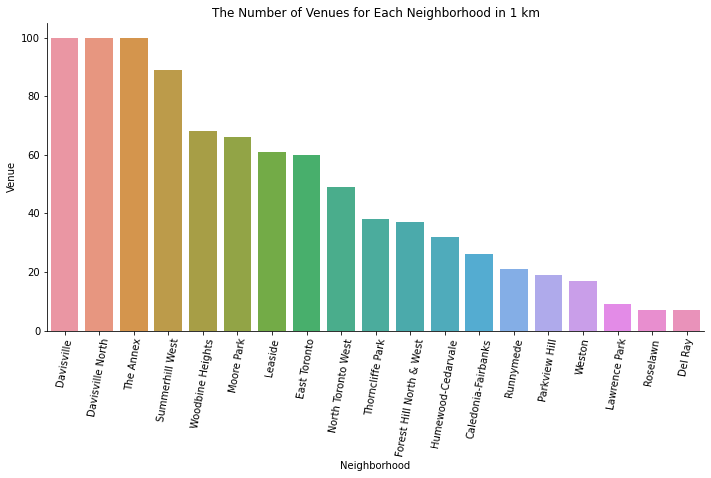

In [21]:
g = sns.catplot( data=neighbor_df, x='Neighborhood', y='Venue', kind='bar', aspect=2)
g.set_xticklabels(rotation=80)
g.set(title='The Number of Venues for Each Neighborhood in 1 km')